## Objective

An NGO committed to fighting poverty and providing basic facilities and assistance to people in underprivileged countries. Recently, they have been able to raise around $10 million. The NGO CEO must decide how to use this money strategically and effectively. A significant issue when making this decision is selecting which country needs the most assistance.

Create an Unsupervised Learning machine learning model using KMeans to group these countries. State clearly which countries you recommend to the CEO in the Conclusion section.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from phik import phik_matrix

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
# evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
# Display
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
#save model
import joblib
import json

# Data Loading & Overview

In [2]:
missing_mark = ['n/a','na','---','?',' ?','? ','nan','no','NaN']
df = pd.read_csv('humanitarian-aid.csv', na_values=missing_mark)
df

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
# Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Description for each column**

> country: Name of the country

> child_mortality : Death of children under 5 years of age per 1000 live births

> exports : Export of goods and services. Given as percentage of the Total GDP

> health : Total health spending as percentage of Total GDP

> imports : Imports of goods and services. Given as percentage of the Total GDP

> income : Net income per person

> inflation : The measurement of the annual growth rate of the Total GDP

> life_expectancy : The average number of years a new born child would live if the current mortality patterns remain the same

> total_fertility : The number of children that would be born to each woman if the current age-fertility rates remain the same

> gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.


## Check Duplicated Value

In [4]:
# Check for Duplicated Value
df.duplicated().sum()

0

*Conclusion for Duplicated Value*

There are 0 duplicated values within the dataset.

## Check Missing Value

In [5]:
# Check for Missing Value
print(df.isna().sum())

print(f'There are {df.isna().sum().sum()} within the dataset')

country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64
There are 0 within the dataset


*Conclusion for Missing Value*

There are no missing value



## Checking for column describe information

In [6]:
# Check the identity value column
df.describe()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Conclusion from describe information :**

In [7]:
# Check the identity value column
df.describe(include='object')

,country
count,167
unique,167
top,Afghanistan
freq,1


There 167 dataset which also has 167 unique countries

### Summary for Data Loading and Overview

1. There are no duplicated value and missing value in the dataset

# EDA

## Data Exploration

In [8]:
df.head()

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


1. Distribution for all the numerical value column

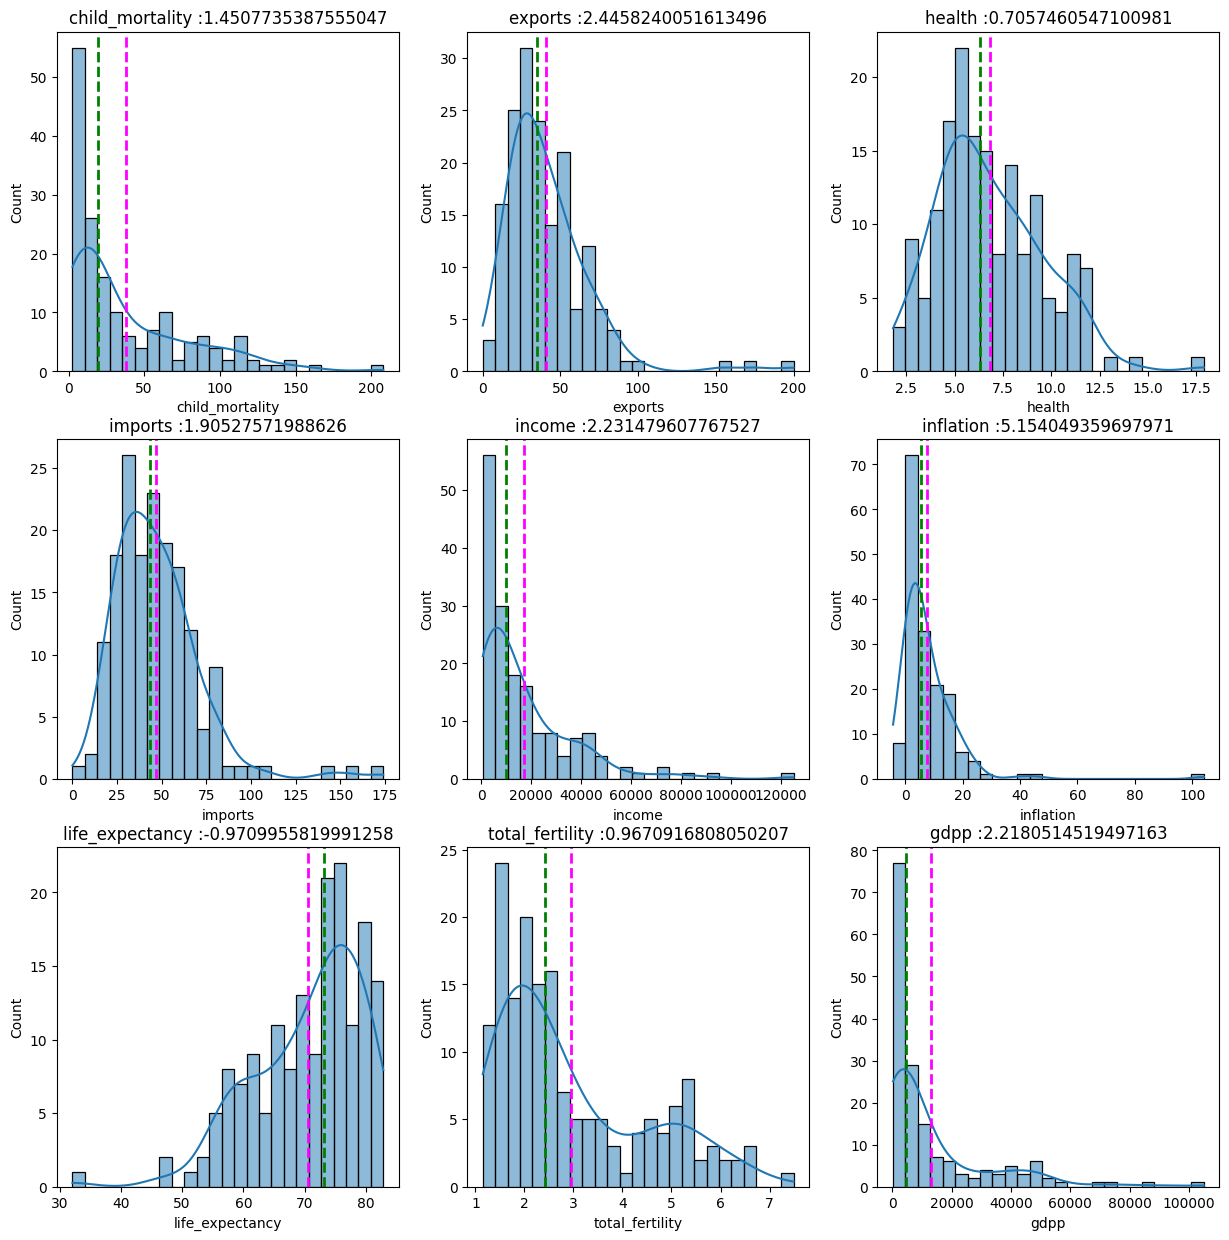

In [9]:
col = ['child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp']

# Exploring the distribution of the col column using Histogram Plot
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[15, 15])
ax = ax.flatten()

for i,j in enumerate(col) :
    sns.histplot(df[j], ax=ax[i], bins=25, kde=True)
    ax[i].axvline(df[j].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[i].axvline(df[j].median(), color='green', linestyle='dashed', linewidth=2)
    ax[i].set_title(f'{str(j)} :{df[j].skew()}')

1. GDP Grouping

Based on https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf :

The united nations grouping the countries in the world based on their GDP :

> low : x <= $1035

> lower_middle : 1036 <= x <= 4085

> upper_middle : 4086 <= x <= 12615

> high : x > 12615

In [10]:
# Define function to define the GPD Grouping
def gdp_group(gdpp):
    if gdpp < 1036:
        return 'low'
    elif 1036 <= gdpp < 4085:
        return 'lower_middle'
    elif 4085 <= gdpp < 12615:
        return 'upper_middle'
    else:
        return 'high'

df['gdp_group'] = df['gdpp'].apply(gdp_group)

In [11]:
df.head()

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,gdp_group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,low
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,upper_middle
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,upper_middle
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,lower_middle
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,upper_middle


2. Group by the GDP group into all related numerical value

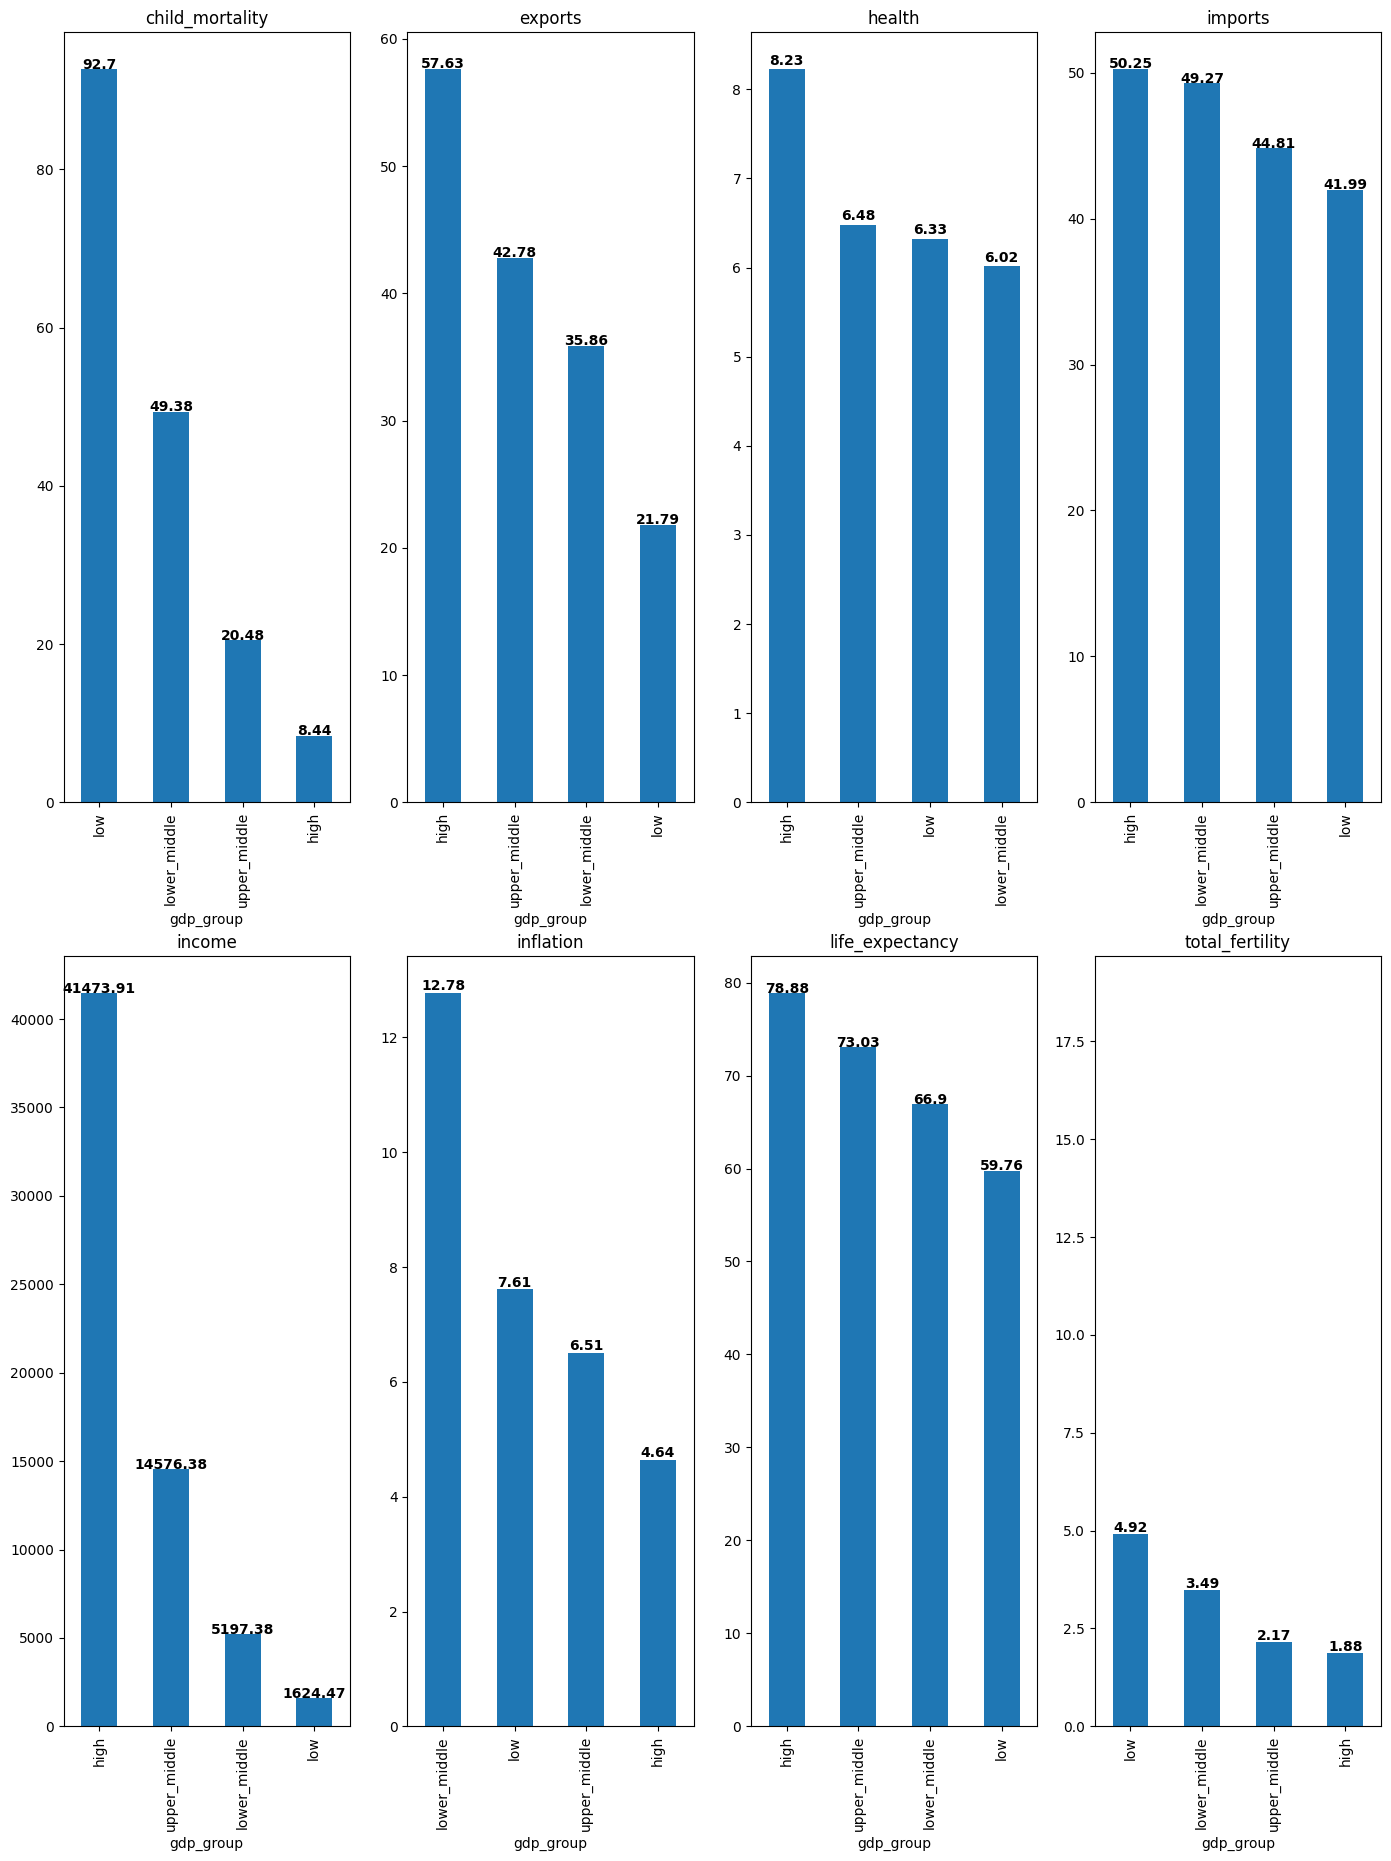

In [12]:
col = ['child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility']

fig, ax = plt.subplots(2,4, figsize=(17,22))

for i, j in enumerate(col):
    viz = df.groupby('gdp_group')[j].mean().sort_values(ascending=False)
    viz.plot(kind='bar', ax=ax.flatten()[i])
    ax.flatten()[i].set_title(j)
    # add the mean value on top of each bar
    for c, v in enumerate(viz.values):
        ax.flatten()[i].text(c, v+0.05, str(round(v,2)), ha='center', fontweight='bold')
    # set y-axis limits
    plt.ylim(0, max(viz.values)*4)

plt.show()

Based on this plot, there are several conclusions could be made :

**Child_Mortality :**

1. The country with the lower gdp, has a worse value of child_mortality

**Exports :**

2. Country with the higher GDP group, has a better export activities compared to the other group

**Health :**

3. Country with the high GDP group has the best health indicator

4. All the remaining group is relatively the same in terms of the health indicator

**Imports**

5. Country with the higher GDP group, has a better import activities compared to the other group

**Income :**

6. Country with the higher GDP group, significantly perform better in terms of income compared to the other group

**Inflation:**

7. It is relatively unstructured, since the ranking for this group is not the same as the other parameter

8. lower_middle has the highest inflation rate, while the high group has the lowest inflation rate

**life expectancy:**

9. The country with the lower gdp, has a worse value of child_mortality

**Total Fertility:**

## Handling

### Duplicated Value Handling

There are no duplicated value

### Missing Value Handling

There are no missing value

In [13]:
df_eda = df.drop(['gdp_group','country'], axis=1)
df_eda.head()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Outlier Data Handling

Define Function for Outlier Detection for each column

In [14]:
def outlier_detect(dataset, column, distance=1.5):
    # Check skewness level
    print(f'Skewness level : {dataset[column].skew()}')
    # Check the IQR
    iqr = dataset[column].quantile(0.75)-dataset[column].quantile(0.25)
    iqr_multiplier = iqr*distance
    # Yielding the Upper & Lower Threshold
    upper_threshold = dataset[column].quantile(0.75) + iqr_multiplier
    lower_threshold = dataset[column].quantile(0.25) - iqr_multiplier
    # Considered Data Outlier
    outlier = dataset[(dataset[column] > upper_threshold) | (dataset[column] < lower_threshold)]
    # Check the amount of the outlier data
    print(f'Total data : {len(dataset[column])}')

    print(f'Data considered as outlier : {len(outlier)}')

    print(f'Percentage considered as outlier : {(len(outlier)/len(dataset[column]))*100}')

    return(upper_threshold, lower_threshold)

In [15]:
def outlier_detect_gaussian(dataset, column):
    # Check skewness level
    print(f'Skewness level : {dataset[column].skew()}')
    # Check the IQR
    mean = dataset[column].mean()
    std = dataset[column].std()
    # Yielding the Upper & Lower Threshold
    upper_threshold = mean + (3*std)
    lower_threshold = mean - (3*std)
    # Considered Data Outlier
    outlier = dataset[(dataset[column] > upper_threshold) | (dataset[column] < lower_threshold)]
    # Check the amount of the outlier data
    print(f'Total data : {len(dataset[column])}')

    print(f'Data considered as outlier : {len(outlier)}')

    print(f'Percentage considered as outlier : {(len(outlier)/len(dataset[column]))*100}')

    return(upper_threshold, lower_threshold)

In [16]:
def distribution_details(dataset, column) :
    # Mean, Median, Mode
    print('Mean :', dataset[column].mean())
    print('Median :', dataset[column].median())
    print('Mode :', dataset[column].mode())

    # Central Tendency
    print('Min : ', dataset[column].min())
    print('Q1 : ', np.quantile(dataset[column], 0.25))
    print('Q2 : ', np.quantile(dataset[column], 0.5))
    print('Q3 : ', np.quantile(dataset[column], 0.75))
    print('Max : ', dataset[column].max())

Since this is the actual value from each countries, we won't handle the outlier value within the dataset

## Final EDA

**CONCLUSION**
 
 There are differences in terms of the gdp_grouping to the relation with another countries parameter

# Feature Engineering

## Multicollinearity Check

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df_eda.loc[:,:]
viz = calc_vif(X)
viz.sort_values(by='VIF',ascending=False)


,variables,VIF
6,life_expectancy,21.916807
7,total_fertility,17.673828
3,imports,17.280234
1,exports,16.084236
4,income,13.414051
2,health,12.421525
8,gdpp,10.298641
0,child_mortality,8.084814
5,inflation,1.985961


Based on VIF, tall the columns shows a high multicollinearity value (>10), except for 2 columns:

1. child_mortality

2. inflation

# Model Building

We will build the model using :

1.  MinMaxScaler

2.  PCA

3.  K-Means Algorithm

In [18]:
# Copying model for model df
df_model = df_eda.copy()
df_model.head()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Scaling : MinMaxScaler

Scaling the value within the df_model with MinMaxScaler function

In [19]:
# Scaling the values within the df_cleaned using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_model = pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns)

df_model

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


## PCA

**Using Elbow Method Ratio to find the optimum n_components**

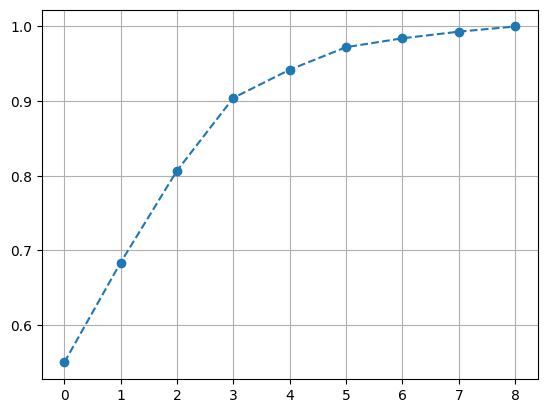

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(df_model)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum,'o--')
plt.grid()
plt.show()

**Using Knee Locator to find the optimum n_components**

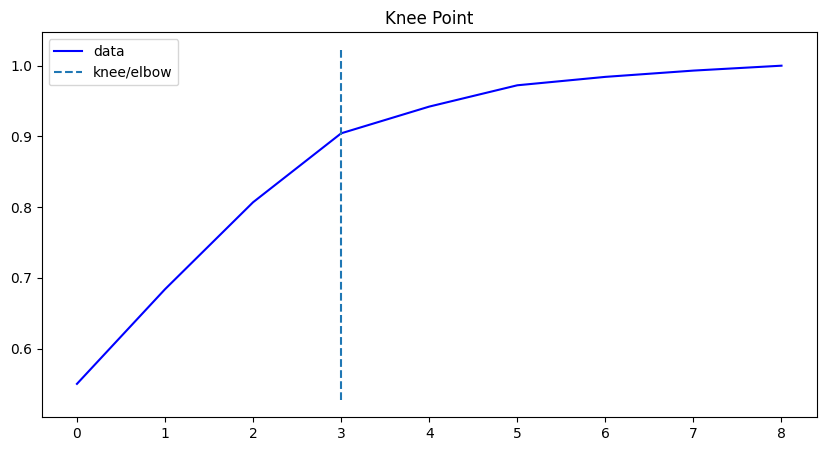

In [21]:
from kneed import KneeLocator
x = np.arange(len(cumsum))
kneedle = KneeLocator(x,cumsum,curve="concave", direction='increasing')
kneedle.plot_knee(figsize=(10,5))

Based on this kneelocator value, we will use the 3 n_components in the model

C:\Users\appsg\AppData\Local\Temp\ipykernel_27476\2482194381.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],palette="tab10")


<Axes: >

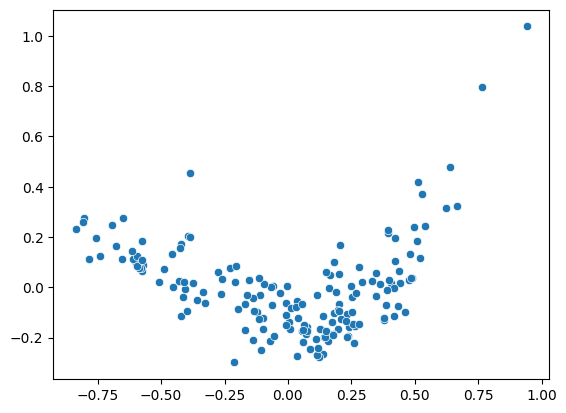

In [22]:
# Using n_components = 3
pca_best = PCA(n_components=3)

df_pca = pca_best.fit_transform(df_model)

# Plotting the newly transformed dataset into 3 n_components with PCA
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],palette="tab10")

## K-Means

Checking the inertia of the K-Cluster based on pre-defined n_clusters

c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\

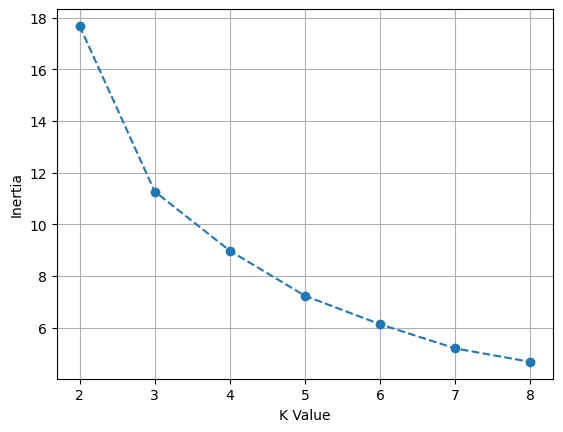

In [23]:
from sklearn.cluster import KMeans
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(df_pca).inertia_ for i in K]
plt.plot(K,inertia,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

From this plot, we might conclude that as the K-Value is getting bigger, the Inertia / Distance of the centroid to the cluster is getting smaller

c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\

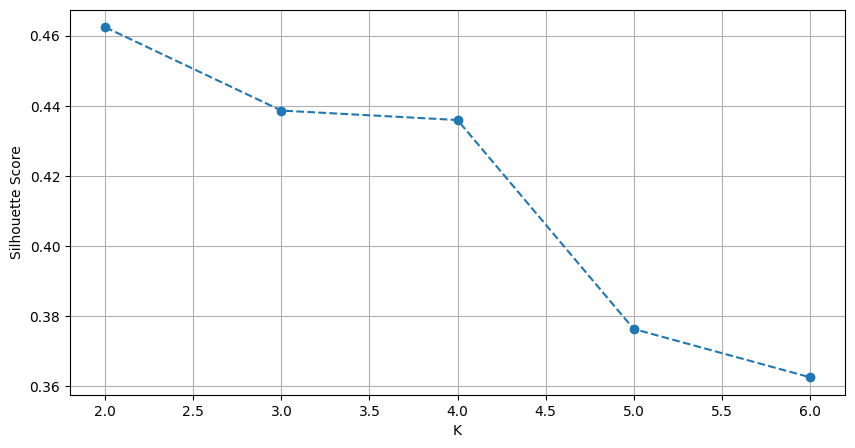

In [24]:
from sklearn.metrics import silhouette_score,silhouette_samples
K=[2,3,4,5,6]
s_score_slc=[silhouette_score(df_pca, KMeans(n_clusters=i).fit(df_pca).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_slc,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Based on the plot above, in terms of the silhoutte score, the most optimum n_clusters within the K_Means algorithm would be 2 or 4

In [25]:
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4623978942049628
For n_clusters = 3 The average silhouette_score is : 0.43863203452366817


c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.435939708716211
For n_clusters = 5 The average silhouette_score is : 0.36625260908505053


c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3474693957888127


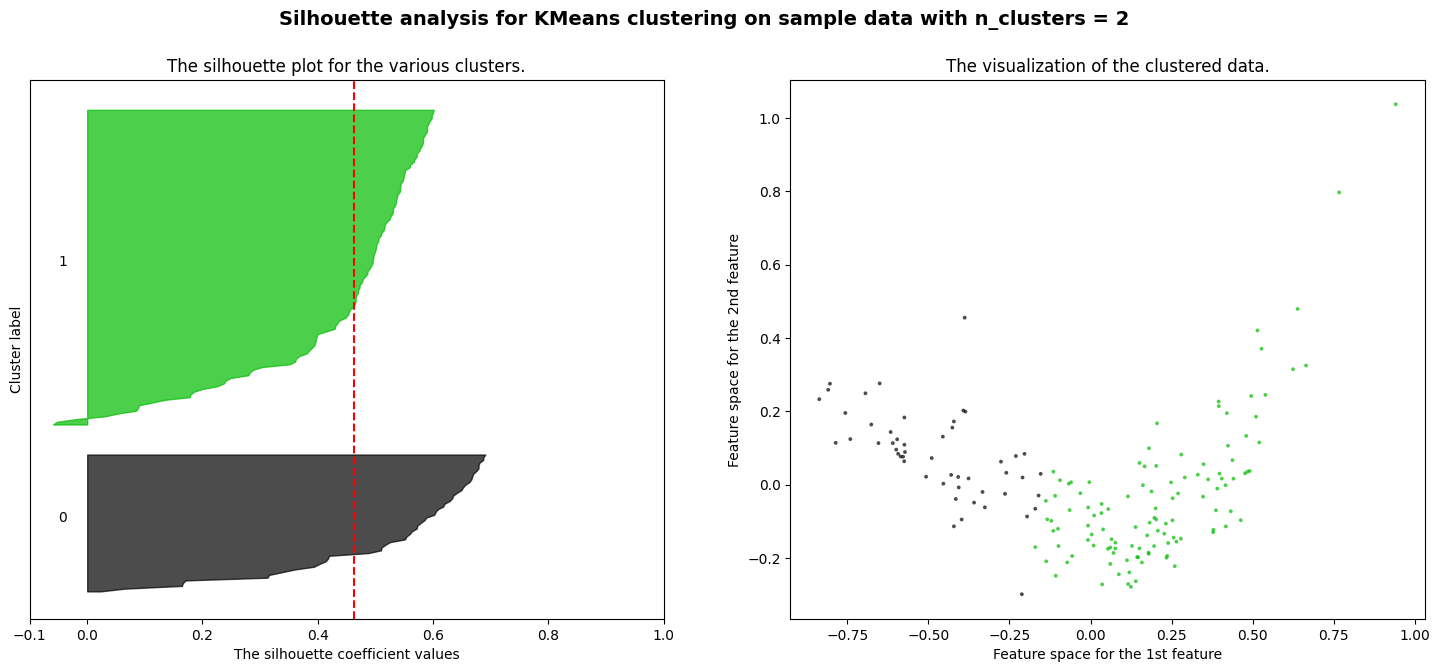

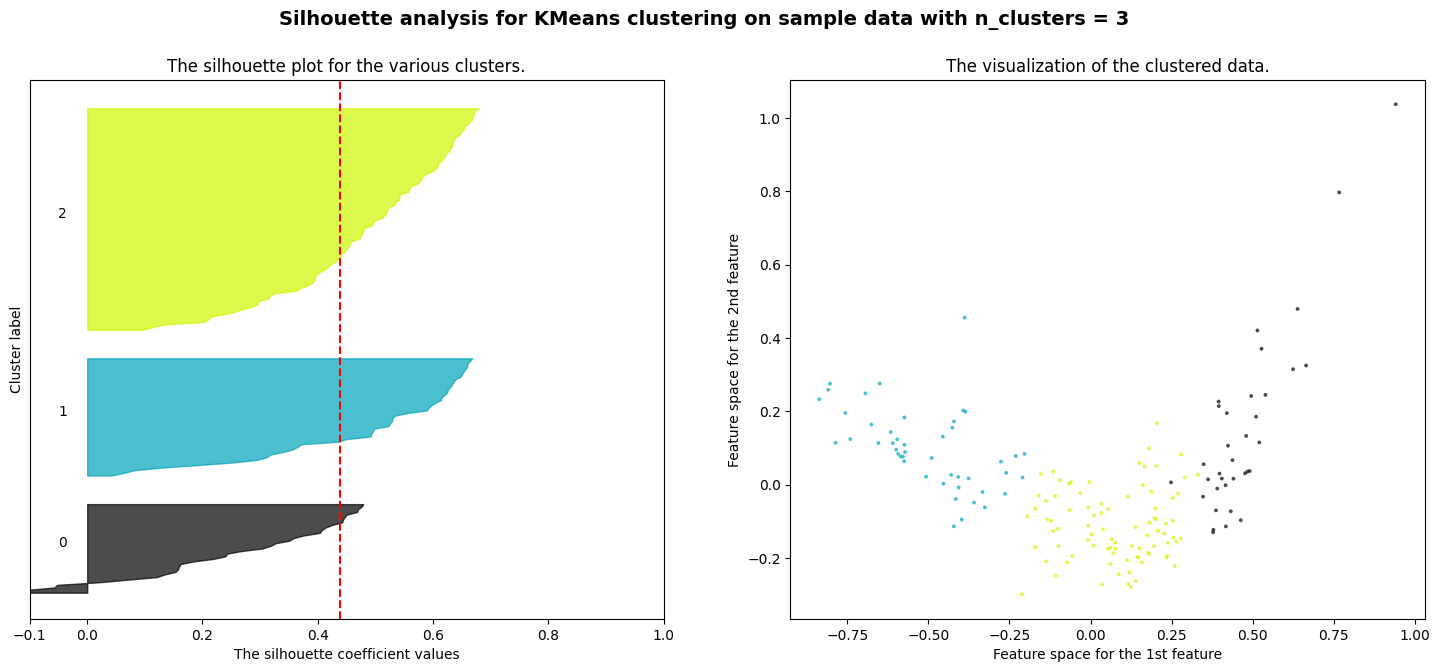

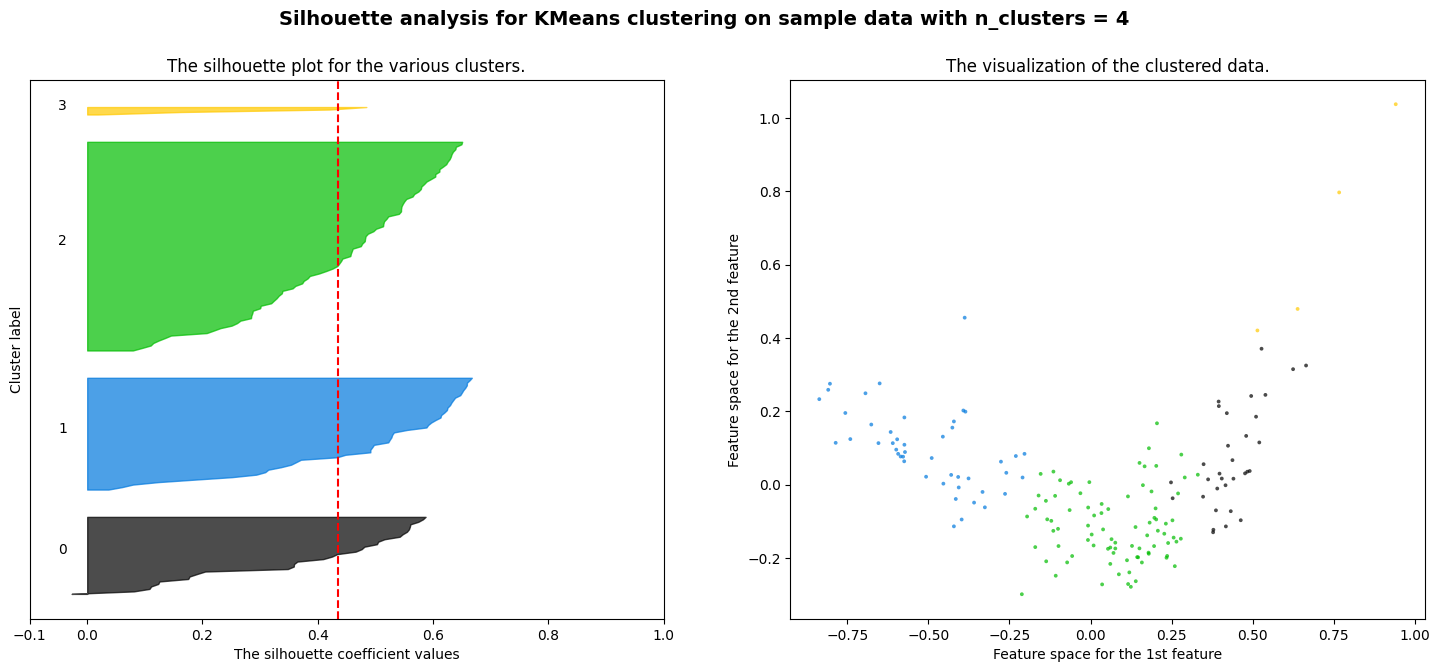

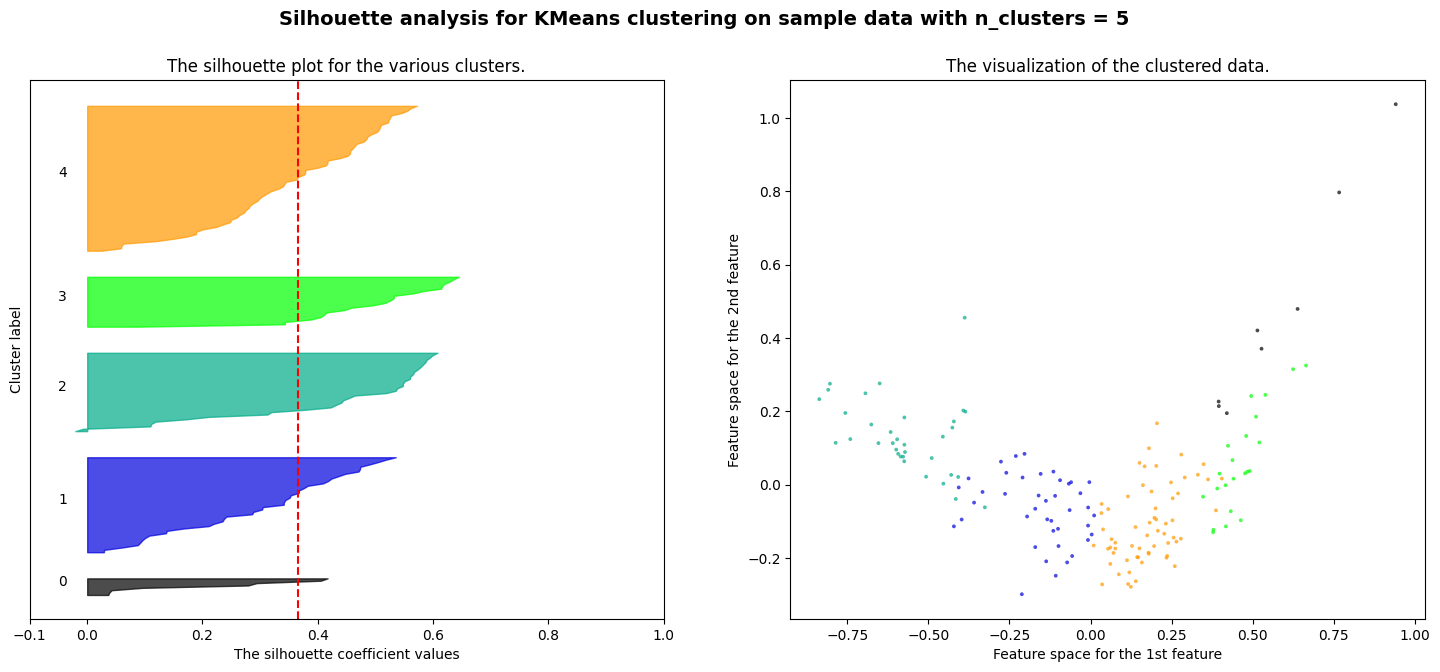

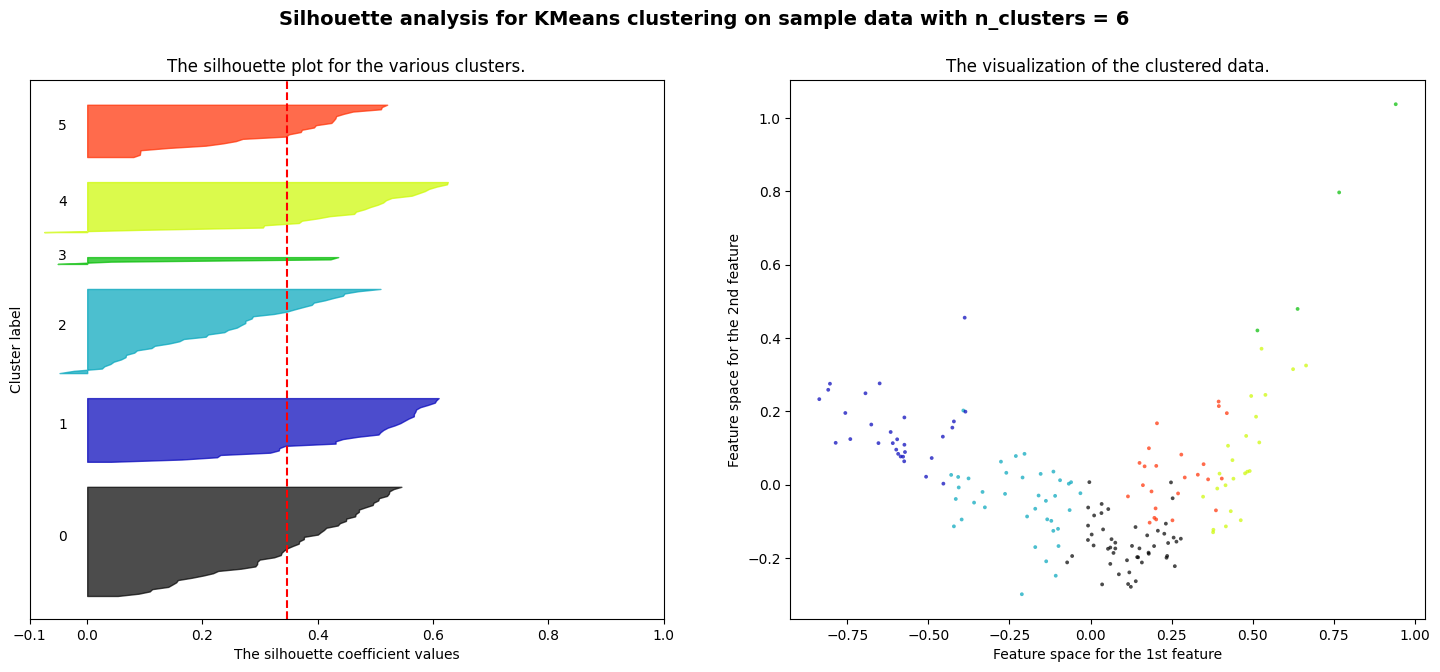

In [26]:
plot_silhouette(KMeans,K,df_pca,'KMeans')

Based on the Silhouette Plot, the n_clusters = 4 gives the best division on how to group the countries based on the PCA value. The 4 n_cluster is clearly dividing the plots into 4 region with minimum value of leakage in the 0 label.

So then, I will go through the model by using n_clusters = 4, which shows a great coefficient score above the average coefficient score and have minimum negative values.

## Pipeline

Based on the analysis above, the feature that will be applied into the pipelines are :

1. Scaling (MinMaxScaler)

2. PCA : n_components = 3

3. K-Means : n_cluster = 4

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
# Create new dataframe

df_pipeline = df.drop('gdp_group',axis=1).copy()

In [29]:
df_pipeline.head()

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [30]:
df_pipeline.columns

Index(['country', 'child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp'],
      dtype='object')

### Preprocessor

In [31]:
col = ['child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp']

# Defining the Numerical Preprocessor 
numeric_norm = col
norm_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler()) # Using MinMaxScaler to Scale the Value
           ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("norm", norm_transformer, numeric_norm),
    ]
)

#### Pipeline for **K-Means**

In [32]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("pca", PCA(n_components=3)),
           ("classifier", KMeans(n_clusters=4, random_state=29))
           ]
)

In [33]:
# Fit the kmeans into data_1
kmeans.fit_transform(df_pipeline)
kmeans_1 = kmeans.fit_predict(df_pipeline)
df_pipeline['label'] = kmeans_1

c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\appsg\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Model EDA

In [34]:
df_pipeline.head()

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


#### Checking the distribution of the countries related to its income and gdp

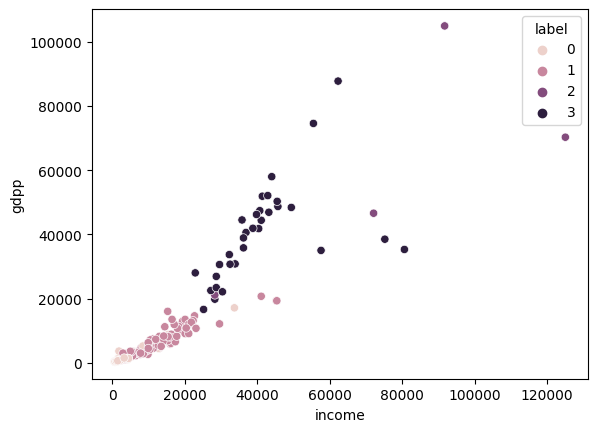

In [35]:
sns.scatterplot(data=df_pipeline, x='income', y='gdpp', hue='label')
plt.show()

From this plot :

1. The 2 & 3 label is relatively shows the countries with GDP > 20.000 and Income > 20.000. With this value, they are classified as the high_income countries

2. The 0 & 1 label is relatively contries that has GDP < 20.000 and Income <20..000. These are classified as the low_income countries

#### Checking the distribution in terms of export & import activities

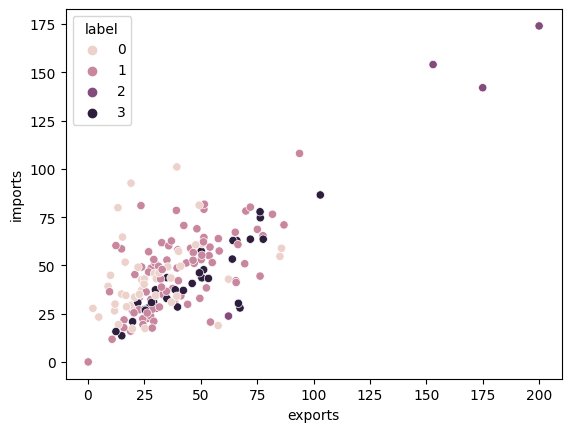

In [36]:
sns.scatterplot(data=df_pipeline, x='exports', y='imports', hue='label')
plt.show()

Based on this plot :

1. The 2 label is relatively shows a high activities in both exports and imports.

2. The 0 label is relatively indicates a higher activities in terms of imports compared to export.

3. The 1 & 3 label is relatively the same, which has adequate amount of activities in both export and import

#### Checking the distribution in terms of child_mortality & health

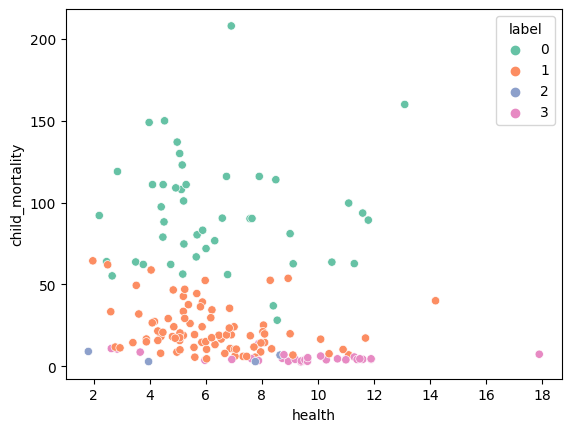

In [37]:
sns.scatterplot(data=df_pipeline, x='health', y='child_mortality', hue='label', palette='Set2')
plt.show()

Based on this plot :

1. The label 2 & 3 has the highest percentage of health spending compared to the other label, and relatively has a low value in child_mortality

2. The label 0 & 1 has the highest child_mortality rate and label 0 is following behind them.

#### Checking the Life Expectancy & Income Parameters

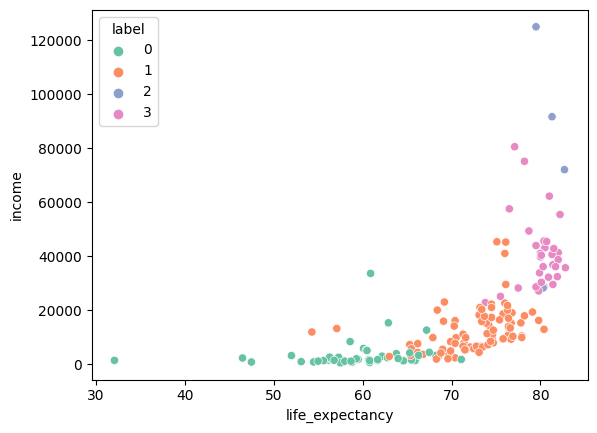

In [38]:
sns.scatterplot(data=df_pipeline, x='life_expectancy', y='income', hue='label', palette='Set2')
plt.show()

Based on this plot :

1. The label 2 & 3 shows relatively high income and high life_expectancy

2. The label 0 shows the worst in terms of income and life_expectancy parameter

#### Focusing on label 0
Based on my observation so far, label 0 shows the worst condition compared to the other label. I will resorting again the countries with the label 2, and find the top 3 worst countries in terms of child mortality and life_expectancy. The reason why we choose 3 countries is so then we the $10 million grant could be effectively distributed and utilized by these countries

In [43]:
df_2 = df_pipeline[df_pipeline['label']==0]
df_2

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,label
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0


We will check the condition based on its life_expectancy and child_mortality value

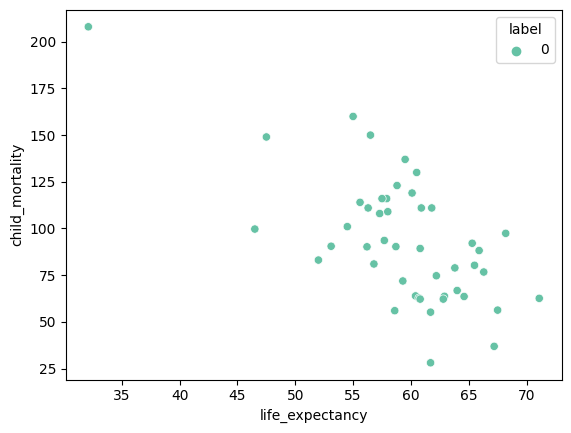

In [44]:
sns.scatterplot(data=df_2, x='life_expectancy', y='child_mortality', hue='label', palette='Set2')
plt.show()

Based on this plot, we will find the countries that :

1. child_mortality > 100

2. life_expectancy < 55

In [45]:
# filter the DataFrame to include only the rows that meet the criteria
df_filtered = df_2[(df_2['child_mortality'] > 100) & (df_2['life_expectancy'] < 55)]

# sort the filtered DataFrame by the "country" column
df_sorted = df_filtered.sort_values(by='country')

# print the sorted DataFrame
print(df_sorted)

                      country  child_mortality  exports  health  imports  \
31   Central African Republic            149.0     11.8    3.98     26.5   
66                      Haiti            208.0     15.3    6.91     64.7   
106                Mozambique            101.0     31.5    5.21     46.2   

     income  inflation  life_expectancy  total_fertility  gdpp  label  
31      888       2.01             47.5             5.21   446      0  
66     1500       5.45             32.1             3.33   662      0  
106     918       7.64             54.5             5.56   419      0  


Countries with the worst child_mortality & life_expectancy are :

1. Central African Republic

2. Haiti

3. Mozambique

### **Overall Conclusion**



From this modelling, we might conclude that :

> Label 2 shows the worst indicator in terms of gdp and income. These bad indicators also led to the worst condition in terms of health, life_expectancy , and child mortality. So then, based on my study, I recommend to grant the $10 million into these 3 countries :

    1. Central African Republic

    2. Haiti

    3. Mozambique





# Model Saving

In [42]:
# Saving Model Logreg

with open('kmeans.pkl', 'wb') as file_1 :
    joblib.dump(kmeans, file_1)